# Homework 03-Classification

This homework will continue working with `housing` dataset as homework-2 but this time we will use `scikit-learn` to work with.

**Features**
For the rest of the homework, you'll need to use only these columns:

- latitude
- longitude
- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income
- median_house_value
- ocean_proximity


## Libraries

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Dataset 

In this homework, we will use the California Housing Prices data from Kaggle.

In [2]:
from pathlib import Path

if not Path('housing.csv').is_file:
    print('File exist')
else:
    print('Downloading dataset...')
    !mkdir dataset
    !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
    !mv housing.csv ./dataset/

mkdir: dataset: File exists
--2022-09-26 13:19:53--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  5.25MB/s    in 0.3s    

2022-09-26 13:19:54 (5.25 MB/s) - ‘housing.csv’ saved [1423529/1423529]



## Data preparation

- Select only the features from above and fill in the missing values with 0.
- Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
- Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
- Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [8]:
df = pd.read_csv('./dataset/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df.total_bedrooms = df.total_bedrooms.fillna(0)
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


### Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

Options:

- NEAR BAY
- <1H OCEAN
- INLAND
- NEAR OCEAN

In [11]:
q1 = df.ocean_proximity.mode()
q1

0    <1H OCEAN
Name: ocean_proximity, dtype: object

### Question 2

- Create the correlation matrix for the numerical features of your train dataset.

    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
    
- What are the two features that have the biggest correlation in this dataset?

Options:

- `total_bedrooms` and `households`
- `total_bedrooms` and `total_rooms`
- `population` and `households`
- `population_per_household` and `total_rooms`


<AxesSubplot:>

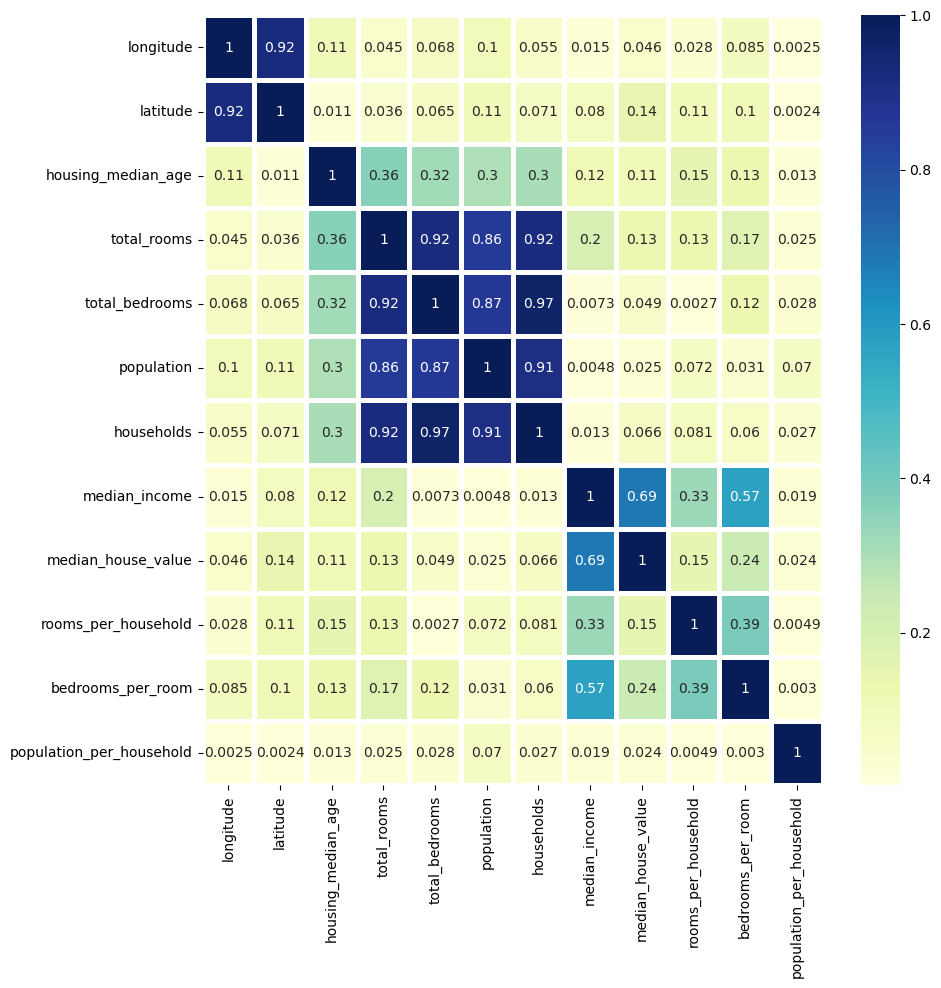

In [15]:
num_col = [col for col in df.columns if col != 'ocean_proximity']
plt.subplots(figsize=(10, 10))
sns.heatmap(df[num_col].corr().abs(), 
                 annot=True, 
                 linewidths=2.5, 
                 cmap="YlGnBu",
                 square=False
                )

### Make median_house_value binary
- We need to turn the median_house_value variable from numeric into binary.
- Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

###  Split the data

- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.

In [24]:
from sklearn.model_selection import train_test_split

target_mean = df['median_house_value'].mean()
above_average = df['median_house_value'] > target_mean
df['median_house_value'] = above_average.astype('int')

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values
y_full_train = df_full_train['median_house_value'].values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
del df_full_train['median_house_value']

### Question 3
Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
What is the value of mutual information?
Round it to 2 decimal digits using round(score, 2)
Options:

- 0.26
- 0
- 0.10
- 0.16

In [22]:
from sklearn.metrics import mutual_info_score
from IPython.display import display

def calculate_mi(series):
    return round(mutual_info_score(series, y_train), 2)

In [23]:
df_mi = calculate_mi(df_train['ocean_proximity'])
df_mi

0.1

### Question 4
Now let's train a logistic regression
Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
Options:

- 0.60
- 0.72
- 0.84
- 0.95

In [25]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [26]:
dv = DictVectorizer(sparse=False)
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [27]:
train_dict = df_train.to_dict(orient='records')
train_dict[0]

{'longitude': -119.67,
 'latitude': 34.43,
 'housing_median_age': 39.0,
 'total_rooms': 1467.0,
 'total_bedrooms': 381.0,
 'population': 1404.0,
 'households': 374.0,
 'median_income': 2.3681,
 'ocean_proximity': '<1H OCEAN',
 'rooms_per_household': 3.9224598930481283,
 'bedrooms_per_room': 0.25971370143149286,
 'population_per_household': 3.7540106951871657}

In [28]:
X_train = dv.fit_transform(train_dict)
print(X_train.shape)
dv.get_feature_names_out()

(12384, 16)


array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [29]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [32]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1].astype('int')
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
y_val

array([0, 0, 1, ..., 1, 1, 0])

In [34]:
round((y_val == y_pred).mean(), 2)

0.59

In [35]:
from sklearn.metrics import accuracy_score

accuracy = np.round(accuracy_score(y_val, y_pred),2)
accuracy

0.59

### Question 5
Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

- total_rooms
- total_bedrooms
- population
- households

**note**: the difference doesn't have to be positive

In [39]:
features = df_train.columns.tolist()
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [53]:
scores = dict()
old_score = accuracy

for feat in features:
    elim_feat = features.copy()
    elim_feat.remove(feat)
    
    train_dict = df_train[elim_feat].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[elim_feat].to_dict(orient='records')    
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
        
    scores[feat] = score, score - old_score

In [73]:
df_diff = pd.DataFrame(scores, index=['new_model', 'original_model_comparison'])
df_min_diff = df_diff[['total_rooms', 'total_bedrooms', 'population', 'households']].min().sort_values()
df_min_diff

population        0.236308
households        0.243576
total_bedrooms    0.245514
total_rooms       0.246967
dtype: float64

### Question 6
For this question, we'll see how to use a linear regression model from Scikit-Learn
We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest alpha.

Options:

- 0
- 0.01
- 0.1
- 1
- 10

In [87]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

df['median_house_value'] = np.log1p(df['median_house_value'])
    
df_full_train, df_test = train_test_split(df, test_size=.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=.25, random_state=42)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values
y_full = df_full_train.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
del df_full_train['median_house_value']

train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dict)
x_val = dv.transform(val_dict)
    

alpha = [0, 0.01, 0.1, 1, 10]
scores = dict()

for a in alpha:
    
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(x_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    scores[f'alpha: {a}'] = round(score, 3)

In [90]:
scores

{'alpha: 0': 0.07928925410486438,
 'alpha: 0.01': 0.0792892541063693,
 'alpha: 0.1': 0.07928925412066516,
 'alpha: 1': 0.07928925426437662,
 'alpha: 10': 0.07928925569923344}

In [100]:
pd.DataFrame(scores, index=['ridge_model'])

,alpha: 0,alpha: 0.01,alpha: 0.1,alpha: 1,alpha: 10
ridge_model,0.079289,0.079289,0.079289,0.079289,0.079289
